In [133]:
import csv
import numpy as np
from matplotlib import pylab as plt
species = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
numberOfFeatures = len(features)
numberOfSpecies = len(species)
colors = [np.random.rand(3) for x in range(numberOfSpecies)]


In [134]:
f = open('iris.csv')
A = []
b = []
numberOfSamples = 0
for row in csv.reader(f):
    if not len(row): break
    numberOfSamples += 1
    A.extend(row[0:-1])
    b.extend(row[-1:])
samplesPerSpecies = numberOfSamples / numberOfSpecies

In [135]:
def featureFromA(featureIndex):
    return [A[x] for x in range(len(A)) if (x - featureIndex) % 4 == 0]

a = featureFromA(0)
b = featureFromA(1)
c = featureFromA(2)
d = featureFromA(3)

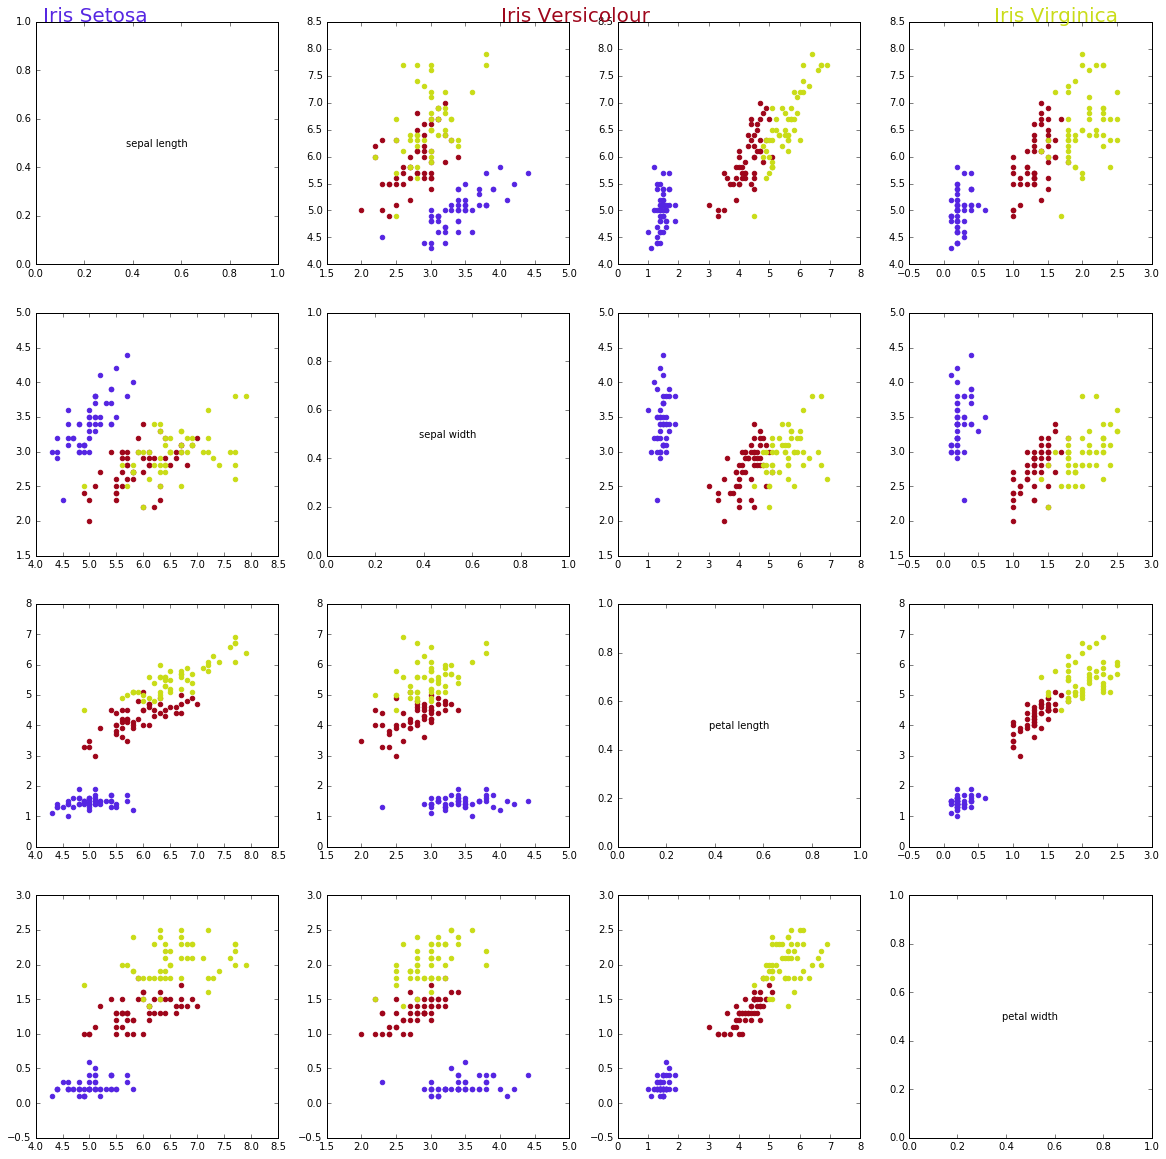

In [143]:
%matplotlib inline

# layout `figure` which contains all the subplots
fg = plt.figure(num=1, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
# display legend
for index in range(len(species)):
    blockWidth = 0.6 / len(species)
    centerX = 0.4index * blockWidth + (0.5 * blockWidth)
    fg.text(centerX, 0.92, species[index], fontsize=20, ha="center",color=colors[index])

# draw one subplot for each feature pair and a text subplot for each feature overlap
numberOfSubplots = numberOfFeatures * numberOfFeatures

def createSubplotForRowAndColumn(row, column):
    plt.subplot(numberOfFeatures, numberOfFeatures, subplot) #subplot(rows, columns, subplot)
    if row == column:
        plt.text(0.5, 0.5, features[row], ha="center", va="center")
        return
    
    xs = [a,b,c,d][column]
    ys = [a,b,c,d][row]
    
    for species in range(numberOfSpecies):
        startingIndex = species * samplesPerSpecies
        subXs = np.array(xs[startingIndex:startingIndex + samplesPerSpecies])
        subYs = np.array(ys[startingIndex:startingIndex + samplesPerSpecies])
        color = colors[species % len(colors)]
        plt.scatter(subXs, subYs, color=color)

for subplot in range(1, numberOfSubplots + 1):
    column = (subplot - 1) % numberOfFeatures
    row = (subplot - 1) / numberOfFeatures
    createSubplotForRowAndColumn(row, column)
    